In [2]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
# Load the dataset
data = pd.read_excel("C:\\Users\\A B Siddik\\Desktop\\ARIMA\\data.xlsx")
data.head()

,Date,New COVID-19 Cases,Total Death COVID-19 Cases,New deaths COVID-19 Cases,Recoveries COVID-19 Cases,Day Average Temp,Rainfall (mm),Vaccination Rate,Population Density,Total Infected COVID-19 Cases
0,2021-01-04,1704,494,11,1010,26.4,11.5,0,96.254,3508.641
1,2021-01-05,1741,501,7,1221,26.5,1.0,0,96.254,3559.940
2,2021-01-06,2027,509,8,1129,27.7,0.0,0,96.254,3619.666
3,2021-01-07,2593,513,4,2145,26.9,25.8,0,96.254,3696.069
4,2021-01-08,3027,521,8,2708,27.5,0.0,0,96.254,3785.261


In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# === Step 1: Load and preprocess data ===
# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Filter dataset between Jan 4, 2021, and Sep 18, 2021
data_filtered = data[(data['Date'] >= '2021-01-04') & (data['Date'] <= '2021-09-18')].reset_index(drop=True)

# Keep original Date column separately
dates = data_filtered['Date']

# Normalize all columns except Date
scaler = MinMaxScaler()
features = data_filtered.drop(columns=['Date'])
normalized_features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
normalized_features['Date'] = dates

# === Step 2: Split into train/val/test ===
train_set = normalized_features[(normalized_features['Date'] >= '2021-01-04') & (normalized_features['Date'] <= '2021-07-02')]
val_set = normalized_features[(normalized_features['Date'] >= '2021-07-03') & (normalized_features['Date'] <= '2021-08-10')]
test_set = normalized_features[(normalized_features['Date'] >= '2021-08-11') & (normalized_features['Date'] <= '2021-09-18')]

# Reset index for each
train_set = train_set.reset_index(drop=True)
val_set = val_set.reset_index(drop=True)
test_set = test_set.reset_index(drop=True)

# === Step 3: Time series model on actual cases ===
# We'll use unnormalized actual cases for ARIMA forecasting
covid_cases_ts = data_filtered.set_index('Date')['New COVID-19 Cases']  # Replace 'Cases' with your actual column name

# Train ARIMA model on training + validation set
arima_train_series = covid_cases_ts['2021-01-04':'2021-08-10']
arima_model = ARIMA(arima_train_series, order=(7,4,6))  # You can optimize (p,d,q) or use auto_arima
arima_model = arima_model.fit()

# Print the model summary
print(arima_model.summary())

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Step 4: Forecast and evaluate
test_data = covid_cases_ts['2021-08-11':'2021-09-18']
forecast = arima_model.forecast(steps=len(test_data))
forecast = pd.Series(forecast, index=test_data.index)

# Metrics
mse = mean_squared_error(test_data, forecast)
mae = mean_absolute_error(test_data, forecast)
mape = np.mean(np.abs((test_data - forecast) / test_data)) * 100
rmse = np.sqrt(mse)
rrmse = rmse / (np.max(test_data) - np.min(test_data))
nrmse = rmse / np.mean(test_data)  # Normalized RMSE by mean
r2 = r2_score(test_data, forecast)

# Print results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Relative RMSE (RRMSE): {rrmse:.4f}")
print(f"Normalized RMSE (NRMSE): {nrmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


E:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
E:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
E:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
E:\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:     New COVID-19 Cases   No. Observations:                  219
Model:                 ARIMA(7, 4, 6)   Log Likelihood               -1732.275
Date:                Mon, 28 Jul 2025   AIC                           3492.551
Time:                        13:00:54   BIC                           3539.740
Sample:                    01-04-2021   HQIC                          3511.617
                         - 08-10-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.8824      0.341     -5.524      0.000      -2.550      -1.214
ar.L2         -1.0699      0.734     -1.458      0.145      -2.508       0.368
ar.L3         -0.6145      0.566     -1.086      0.2

E:\anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [9]:
# Assuming your model is called `arima_model`
forecast = arima_model.forecast(steps=7)  # 7 days forecast
forecast.index = pd.date_range(start='2021-09-12', periods=7, freq='D')
print(forecast)


2021-09-12    18244.780849
2021-09-13    19414.104306
2021-09-14    20406.755281
2021-09-15    20717.740675
2021-09-16    20514.247754
2021-09-17    19903.905194
2021-09-18    19524.769092
Freq: D, Name: predicted_mean, dtype: float64


In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# === Step 1: Load and preprocess data ===
# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Filter dataset between Jan 4, 2021, and Sep 18, 2021
data_filtered = data[(data['Date'] >= '2021-01-04') & (data['Date'] <= '2021-09-18')].reset_index(drop=True)

# Keep original Date column separately
dates = data_filtered['Date']

# Normalize all columns except Date
scaler = MinMaxScaler()
features = data_filtered.drop(columns=['Date'])
normalized_features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
normalized_features['Date'] = dates

# === Step 2: Split into train/val/test ===
train_set = normalized_features[(normalized_features['Date'] >= '2021-01-04') & (normalized_features['Date'] <= '2021-07-02')]
val_set = normalized_features[(normalized_features['Date'] >= '2021-07-03') & (normalized_features['Date'] <= '2021-08-10')]
test_set = normalized_features[(normalized_features['Date'] >= '2021-08-11') & (normalized_features['Date'] <= '2021-09-18')]

# Reset index for each
train_set = train_set.reset_index(drop=True)
val_set = val_set.reset_index(drop=True)
test_set = test_set.reset_index(drop=True)

# === Step 3: Time series model on actual cases ===
# We'll use unnormalized actual cases for ARIMA forecasting
covid_cases_ts = data_filtered.set_index('Date')['New COVID-19 Cases']  # Replace 'Cases' with your actual column name

# Train ARIMA model on training + validation set
arima_train_series = covid_cases_ts['2021-01-04':'2021-08-10']
arima_model = ARIMA(arima_train_series, order=(6,1,6))  # You can optimize (p,d,q) or use auto_arima
arima_model = arima_model.fit()

# Print the model summary
print(arima_model.summary())

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Step 4: Forecast and evaluate
test_data = covid_cases_ts['2021-08-11':'2021-09-18']
forecast = arima_model.forecast(steps=len(test_data))
forecast = pd.Series(forecast, index=test_data.index)

# Metrics
mse = mean_squared_error(test_data, forecast)
mae = mean_absolute_error(test_data, forecast)
mape = np.mean(np.abs((test_data - forecast) / test_data)) * 100
rmse = np.sqrt(mse)
rrmse = rmse / (np.max(test_data) - np.min(test_data))
nrmse = rmse / np.mean(test_data)  # Normalized RMSE by mean
r2 = r2_score(test_data, forecast)

# Print results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Relative RMSE (RRMSE): {rrmse:.4f}")
print(f"Normalized RMSE (NRMSE): {nrmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


E:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
E:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
E:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:     New COVID-19 Cases   No. Observations:                  219
Model:                 ARIMA(6, 1, 6)   Log Likelihood               -1714.649
Date:                Sun, 27 Jul 2025   AIC                           3455.298
Time:                        21:38:21   BIC                           3499.297
Sample:                    01-04-2021   HQIC                          3473.070
                         - 08-10-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1433      0.144      7.924      0.000       0.861       1.426
ar.L2         -0.0756      0.152     -0.498      0.619      -0.373       0.222
ar.L3         -0.4536      0.132     -3.433      0.0

E:\anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# === Step 1: Load and preprocess data ===
# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Filter dataset between Jan 4, 2021, and Sep 18, 2021
data_filtered = data[(data['Date'] >= '2021-01-04') & (data['Date'] <= '2021-09-18')].reset_index(drop=True)

# Keep original Date column separately
dates = data_filtered['Date']

# Normalize all columns except Date
scaler = MinMaxScaler()
features = data_filtered.drop(columns=['Date'])
normalized_features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
normalized_features['Date'] = dates

# === Step 2: Split into train/val/test ===
train_set = normalized_features[(normalized_features['Date'] >= '2021-01-04') & (normalized_features['Date'] <= '2021-07-02')]
val_set = normalized_features[(normalized_features['Date'] >= '2021-07-03') & (normalized_features['Date'] <= '2021-08-10')]
test_set = normalized_features[(normalized_features['Date'] >= '2021-08-11') & (normalized_features['Date'] <= '2021-09-18')]

# Reset index for each
train_set = train_set.reset_index(drop=True)
val_set = val_set.reset_index(drop=True)
test_set = test_set.reset_index(drop=True)

# === Step 3: Time series model on actual cases ===
# We'll use unnormalized actual cases for ARIMA forecasting
covid_cases_ts = data_filtered.set_index('Date')['New COVID-19 Cases']  # Replace 'Cases' with your actual column name

# Train ARIMA model on training + validation set
arima_train_series = covid_cases_ts['2021-01-04':'2021-08-10']
arima_model = ARIMA(arima_train_series, order=(5,1,5))  # You can optimize (p,d,q) or use auto_arima
arima_model = arima_model.fit()

# Print the model summary
print(arima_model.summary())

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Step 4: Forecast and evaluate
test_data = covid_cases_ts['2021-08-11':'2021-09-18']
forecast = arima_model.forecast(steps=len(test_data))
forecast = pd.Series(forecast, index=test_data.index)

# Metrics
mse = mean_squared_error(test_data, forecast)
mae = mean_absolute_error(test_data, forecast)
mape = np.mean(np.abs((test_data - forecast) / test_data)) * 100
rmse = np.sqrt(mse)
rrmse = rmse / (np.max(test_data) - np.min(test_data))
nrmse = rmse / np.mean(test_data)  # Normalized RMSE by mean
r2 = r2_score(test_data, forecast)

# Print results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Relative RMSE (RRMSE): {rrmse:.4f}")
print(f"Normalized RMSE (NRMSE): {nrmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


E:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
E:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
E:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
E:\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:     New COVID-19 Cases   No. Observations:                  219
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -1714.656
Date:                Sun, 27 Jul 2025   AIC                           3451.311
Time:                        21:41:15   BIC                           3488.541
Sample:                    01-04-2021   HQIC                          3466.349
                         - 08-10-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6916      0.860      1.967      0.049       0.006       3.377
ar.L2         -0.6034      2.338     -0.258      0.796      -5.185       3.978
ar.L3         -1.1794      2.884     -0.409      0.6

E:\anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# === Step 1: Load and preprocess data ===
# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Filter dataset between Jan 4, 2021, and Sep 18, 2021
data_filtered = data[(data['Date'] >= '2021-01-04') & (data['Date'] <= '2021-09-18')].reset_index(drop=True)

# Keep original Date column separately
dates = data_filtered['Date']

# Normalize all columns except Date
scaler = MinMaxScaler()
features = data_filtered.drop(columns=['Date'])
normalized_features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
normalized_features['Date'] = dates

# === Step 2: Split into train/val/test ===
train_set = normalized_features[(normalized_features['Date'] >= '2021-01-04') & (normalized_features['Date'] <= '2021-07-02')]
val_set = normalized_features[(normalized_features['Date'] >= '2021-07-03') & (normalized_features['Date'] <= '2021-08-10')]
test_set = normalized_features[(normalized_features['Date'] >= '2021-08-11') & (normalized_features['Date'] <= '2021-09-18')]

# Reset index for each
train_set = train_set.reset_index(drop=True)
val_set = val_set.reset_index(drop=True)
test_set = test_set.reset_index(drop=True)

# === Step 3: Time series model on actual cases ===
# We'll use unnormalized actual cases for ARIMA forecasting
covid_cases_ts = data_filtered.set_index('Date')['New COVID-19 Cases']  # Replace 'Cases' with your actual column name

# Train ARIMA model on training + validation set
arima_train_series = covid_cases_ts['2021-01-04':'2021-08-10']
arima_model = ARIMA(arima_train_series, order=(3,1,6))  # You can optimize (p,d,q) or use auto_arima
arima_model = arima_model.fit()

# Print the model summary
print(arima_model.summary())

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Step 4: Forecast and evaluate
test_data = covid_cases_ts['2021-08-11':'2021-09-18']
forecast = arima_model.forecast(steps=len(test_data))
forecast = pd.Series(forecast, index=test_data.index)

# Metrics
mse = mean_squared_error(test_data, forecast)
mae = mean_absolute_error(test_data, forecast)
mape = np.mean(np.abs((test_data - forecast) / test_data)) * 100
rmse = np.sqrt(mse)
rrmse = rmse / (np.max(test_data) - np.min(test_data))
nrmse = rmse / np.mean(test_data)  # Normalized RMSE by mean
r2 = r2_score(test_data, forecast)

# Print results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Relative RMSE (RRMSE): {rrmse:.4f}")
print(f"Normalized RMSE (NRMSE): {nrmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


E:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
E:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
E:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:     New COVID-19 Cases   No. Observations:                  219
Model:                 ARIMA(3, 1, 6)   Log Likelihood               -1718.425
Date:                Sun, 27 Jul 2025   AIC                           3456.850
Time:                        21:44:59   BIC                           3490.695
Sample:                    01-04-2021   HQIC                          3470.520
                         - 08-10-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.1412      0.068     31.707      0.000       2.009       2.274
ar.L2         -2.1148      0.083    -25.401      0.000      -2.278      -1.952
ar.L3          0.8963      0.065     13.817      0.0

E:\anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# === Step 1: Load and preprocess data ===
# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Filter dataset between Jan 4, 2021, and Sep 18, 2021
data_filtered = data[(data['Date'] >= '2021-01-04') & (data['Date'] <= '2021-09-18')].reset_index(drop=True)

# Keep original Date column separately
dates = data_filtered['Date']

# Normalize all columns except Date
scaler = MinMaxScaler()
features = data_filtered.drop(columns=['Date'])
normalized_features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
normalized_features['Date'] = dates

# === Step 2: Split into train/val/test ===
train_set = normalized_features[(normalized_features['Date'] >= '2021-01-04') & (normalized_features['Date'] <= '2021-07-02')]
val_set = normalized_features[(normalized_features['Date'] >= '2021-07-03') & (normalized_features['Date'] <= '2021-08-10')]
test_set = normalized_features[(normalized_features['Date'] >= '2021-08-11') & (normalized_features['Date'] <= '2021-09-18')]

# Reset index for each
train_set = train_set.reset_index(drop=True)
val_set = val_set.reset_index(drop=True)
test_set = test_set.reset_index(drop=True)

# === Step 3: Time series model on actual cases ===
# We'll use unnormalized actual cases for ARIMA forecasting
covid_cases_ts = data_filtered.set_index('Date')['New COVID-19 Cases']  # Replace 'Cases' with your actual column name

# Train ARIMA model on training + validation set
arima_train_series = covid_cases_ts['2021-01-04':'2021-08-10']
arima_model = ARIMA(arima_train_series, order=(2,3,8))  # You can optimize (p,d,q) or use auto_arima
arima_model = arima_model.fit()

# Print the model summary
print(arima_model.summary())

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Step 4: Forecast and evaluate
test_data = covid_cases_ts['2021-08-11':'2021-09-18']
forecast = arima_model.forecast(steps=len(test_data))
forecast = pd.Series(forecast, index=test_data.index)

# Metrics
mse = mean_squared_error(test_data, forecast)
mae = mean_absolute_error(test_data, forecast)
mape = np.mean(np.abs((test_data - forecast) / test_data)) * 100
rmse = np.sqrt(mse)
rrmse = rmse / (np.max(test_data) - np.min(test_data))
nrmse = rmse / np.mean(test_data)  # Normalized RMSE by mean
r2 = r2_score(test_data, forecast)

# Print results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Relative RMSE (RRMSE): {rrmse:.4f}")
print(f"Normalized RMSE (NRMSE): {nrmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


E:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
E:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
E:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
E:\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:     New COVID-19 Cases   No. Observations:                  219
Model:                 ARIMA(2, 3, 8)   Log Likelihood               -1726.672
Date:                Sun, 27 Jul 2025   AIC                           3475.345
Time:                        21:48:09   BIC                           3512.473
Sample:                    01-04-2021   HQIC                          3490.345
                         - 08-10-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5217      0.056    -27.179      0.000      -1.631      -1.412
ar.L2         -0.9187      0.058    -15.797      0.000      -1.033      -0.805
ma.L1         -0.5632      0.140     -4.012      0.0

E:\anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# === Step 1: Load and preprocess data ===
# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Filter dataset between Jan 4, 2021, and Sep 18, 2021
data_filtered = data[(data['Date'] >= '2021-01-04') & (data['Date'] <= '2021-09-18')].reset_index(drop=True)

# Keep original Date column separately
dates = data_filtered['Date']

# Normalize all columns except Date
scaler = MinMaxScaler()
features = data_filtered.drop(columns=['Date'])
normalized_features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
normalized_features['Date'] = dates

# === Step 2: Split into train/val/test ===
train_set = normalized_features[(normalized_features['Date'] >= '2021-01-04') & (normalized_features['Date'] <= '2021-07-02')]
val_set = normalized_features[(normalized_features['Date'] >= '2021-07-03') & (normalized_features['Date'] <= '2021-08-10')]
test_set = normalized_features[(normalized_features['Date'] >= '2021-08-11') & (normalized_features['Date'] <= '2021-09-18')]

# Reset index for each
train_set = train_set.reset_index(drop=True)
val_set = val_set.reset_index(drop=True)
test_set = test_set.reset_index(drop=True)

# === Step 3: Time series model on actual cases ===
# We'll use unnormalized actual cases for ARIMA forecasting
covid_cases_ts = data_filtered.set_index('Date')['New COVID-19 Cases']  # Replace 'Cases' with your actual column name

# Train ARIMA model on training + validation set
arima_train_series = covid_cases_ts['2021-01-04':'2021-08-10']
arima_model = ARIMA(arima_train_series, order=(0,3,7))  # You can optimize (p,d,q) or use auto_arima
arima_model = arima_model.fit()

# Print the model summary
print(arima_model.summary())

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Step 4: Forecast and evaluate
test_data = covid_cases_ts['2021-08-11':'2021-09-18']
forecast = arima_model.forecast(steps=len(test_data))
forecast = pd.Series(forecast, index=test_data.index)

# Metrics
mse = mean_squared_error(test_data, forecast)
mae = mean_absolute_error(test_data, forecast)
mape = np.mean(np.abs((test_data - forecast) / test_data)) * 100
rmse = np.sqrt(mse)
rrmse = rmse / (np.max(test_data) - np.min(test_data))
nrmse = rmse / np.mean(test_data)  # Normalized RMSE by mean
r2 = r2_score(test_data, forecast)

# Print results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Relative RMSE (RRMSE): {rrmse:.4f}")
print(f"Normalized RMSE (NRMSE): {nrmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


E:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
E:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
E:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
E:\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:     New COVID-19 Cases   No. Observations:                  219
Model:                 ARIMA(0, 3, 7)   Log Likelihood               -1724.559
Date:                Sun, 27 Jul 2025   AIC                           3465.118
Time:                        21:51:42   BIC                           3492.120
Sample:                    01-04-2021   HQIC                          3476.027
                         - 08-10-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -2.1056      0.092    -22.946      0.000      -2.285      -1.926
ma.L2          1.1641      0.162      7.199      0.000       0.847       1.481
ma.L3         -0.0834      0.139     -0.602      0.5

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# === Load and preprocess data ===
data = pd.read_excel("C:\\Users\\A B Siddik\\Desktop\\ARIMA\\data.xlsx")
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data = data[(data['Date'] >= '2021-01-04') & (data['Date'] <= '2021-09-18')].reset_index(drop=True)

target_col = 'New COVID-19 Cases'
target_series = data[[target_col, 'Date']].copy()

# === Define date-based splits (same as ARIMA) ===
train_data = target_series[(target_series['Date'] <= '2021-08-10')]
test_data = target_series[(target_series['Date'] >= '2021-08-11') & (target_series['Date'] <= '2021-09-18')]

# === Normalize based on training only ===
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data[[target_col]])
test_scaled = scaler.transform(test_data[[target_col]])

# === Create sequences ===
def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(seq_len, len(data)):
        X.append(data[i - seq_len:i])
        y.append(data[i])
    return np.array(X), np.array(y)

seq_length = 10
x_train, y_train = create_sequences(train_scaled, seq_length)
x_test, y_test = create_sequences(test_scaled, seq_length)

# === Build and train LSTM model ===
model = Sequential()
model.add(LSTM(64, input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, epochs=200, batch_size=16, verbose=1)

# === Predict on test set ===
y_pred = model.predict(x_test)

# === Inverse scale predictions and true values ===
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

# === Evaluate LSTM model ===
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
mape = np.mean(np.abs((y_test_rescaled - y_pred_rescaled) / y_test_rescaled)) * 100
rmse = np.sqrt(mse)
rrmse = rmse / (np.max(y_test_rescaled) - np.min(y_test_rescaled))
nrmse = rmse / np.mean(y_test_rescaled)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

print("\n📊 Final LSTM Forecast Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Relative RMSE (RRMSE): {rrmse:.4f}")
print(f"Normalized RMSE (NRMSE): {nrmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


Epoch 1/200


E:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0982
Epoch 2/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0124
Epoch 3/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0055
Epoch 4/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0026
Epoch 5/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0035
Epoch 6/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0026
Epoch 7/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0026
Epoch 8/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0027
Epoch 9/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0024
Epoch 10/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0030
Epoch 11/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0026
Epoch 12/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0025
Epoch 13/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0032
Epoch 14/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0025
Epoch 15/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0027
Epoch

In [13]:
# === Define forecast horizon (same as your ARIMA example) ===
forecast_horizon = pd.date_range(start='2021-09-12', end='2021-09-18')

# === Start with the last known sequence from test data ===
last_sequence = test_scaled[-seq_length:]  # shape (10, 1)

forecast_scaled = []

for _ in range(len(forecast_horizon)):
    # Reshape to (1, seq_len, 1) for LSTM input
    input_seq = last_sequence.reshape((1, seq_length, 1))

    # Predict next value
    next_scaled = model.predict(input_seq, verbose=0)[0][0]

    # Append prediction
    forecast_scaled.append([next_scaled])

    # Update sequence: drop first, append prediction
    last_sequence = np.vstack((last_sequence[1:], [[next_scaled]]))

# Inverse transform forecasted values
forecast_scaled = np.array(forecast_scaled)
forecast_rescaled = scaler.inverse_transform(forecast_scaled)

# Convert to Pandas Series with date index
lstm_forecast_series = pd.Series(forecast_rescaled.flatten(), index=forecast_horizon)

print("\n📈 LSTM Rolling Forecast:")
print(lstm_forecast_series)



📈 LSTM Rolling Forecast:
2021-09-12    18271.988281
2021-09-13    18724.783203
2021-09-14    18967.937500
2021-09-15    19182.982422
2021-09-16    19411.130859
2021-09-17    19678.951172
2021-09-18    19894.712891
Freq: D, dtype: float32


E:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
E:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
E:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
E:\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Epoch 1/200


E:\anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
E:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.3349
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0306
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0146
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0213
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0165
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0150
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0175
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0186
Epoch 9/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0150
Epoch 10/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0161
Epoch 11/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0157
Epoch 12/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0169
Epoch 13/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0171
Epoch 14/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0205
Epoch 15/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0137
Epoch 16/200
13

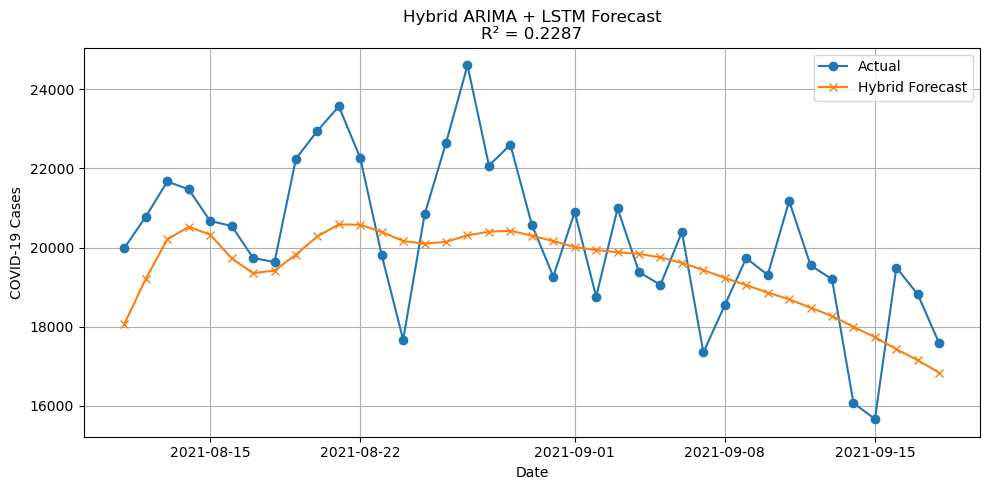

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# === Step 1: Load and prepare data ===
data = pd.read_excel("C:\\Users\\A B Siddik\\Desktop\\ARIMA\\data.xlsx")
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data = data[(data['Date'] >= '2021-01-04') & (data['Date'] <= '2021-09-18')].reset_index(drop=True)

target_col = 'New COVID-19 Cases'
ts = data.set_index('Date')[target_col]

# === Step 2: Train/test split ===
train_ts = ts[:'2021-08-10']
test_ts = ts['2021-08-11':'2021-09-18']

# === Step 3: Fit best ARIMA model ===
best_order = (7, 4, 6)  # Use your best found (p,d,q) here
arima_model = ARIMA(train_ts, order=best_order).fit()

# === Step 4: Forecast on test set using ARIMA ===
arima_forecast = arima_model.forecast(steps=len(test_ts))
arima_forecast.index = test_ts.index

# === Step 5: Calculate residuals on training data ===
arima_pred_train = arima_model.predict(start=train_ts.index[1], end=train_ts.index[-1])
residuals = train_ts[1:] - arima_pred_train

# === Step 6: Scale residuals and create LSTM sequences ===
scaler = MinMaxScaler()
residuals_scaled = scaler.fit_transform(residuals.values.reshape(-1, 1))

def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(seq_len, len(data)):
        X.append(data[i - seq_len:i])
        y.append(data[i])
    return np.array(X), np.array(y)

seq_len = 10
x_lstm, y_lstm = create_sequences(residuals_scaled, seq_len)

# === Step 7: Build and train LSTM ===
model = Sequential()
model.add(LSTM(64, input_shape=(seq_len, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_lstm, y_lstm, epochs=200, batch_size=16, verbose=1)

# === Step 8: Predict residuals on test set ===
resid_history = residuals_scaled[-seq_len:].flatten().tolist()
lstm_pred_scaled = []

for _ in range(len(test_ts)):
    input_seq = np.array(resid_history[-seq_len:]).reshape(1, seq_len, 1)
    pred = model.predict(input_seq, verbose=0)[0][0]
    lstm_pred_scaled.append(pred)
    resid_history.append(pred)

lstm_pred_resid = scaler.inverse_transform(np.array(lstm_pred_scaled).reshape(-1, 1)).flatten()

# === Step 9: Final hybrid forecast ===
hybrid_forecast = arima_forecast.values + lstm_pred_resid

# === Step 10: Evaluate hybrid model ===
actual = test_ts.values
mse = mean_squared_error(actual, hybrid_forecast)
mae = mean_absolute_error(actual, hybrid_forecast)
mape = np.mean(np.abs((actual - hybrid_forecast) / actual)) * 100
rmse = np.sqrt(mse)
rrmse = rmse / (np.max(actual) - np.min(actual))
nrmse = rmse / np.mean(actual)
r2 = r2_score(actual, hybrid_forecast)

print("\n📊 Final Hybrid ARIMA + LSTM Forecast Evaluation:")
print(f"ARIMA Order Used: {best_order}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Relative RMSE (RRMSE): {rrmse:.4f}")
print(f"Normalized RMSE (NRMSE): {nrmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# === Plot actual vs hybrid forecast ===
plt.figure(figsize=(10, 5))
plt.plot(test_ts.index, actual, label='Actual', marker='o')
plt.plot(test_ts.index, hybrid_forecast, label='Hybrid Forecast', marker='x')
plt.title(f"Hybrid ARIMA + LSTM Forecast\nR² = {r2:.4f}")
plt.xlabel("Date")
plt.ylabel("COVID-19 Cases")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:
# === Extract hybrid forecast for 12/9/21 to 18/9/21 ===
forecast_range = pd.date_range(start='2021-09-12', end='2021-09-18')
hybrid_forecast_series = pd.Series(hybrid_forecast, index=test_ts.index)
selected_forecast = hybrid_forecast_series.loc[forecast_range]

# Print forecasted values for the selected range
print("\n📅 Hybrid Forecast: 12/09/2021 to 18/09/2021")
print(selected_forecast.round(0).astype(int))



📅 Hybrid Forecast: 12/09/2021 to 18/09/2021
2021-09-12    18480
2021-09-13    18269
2021-09-14    17997
2021-09-15    17736
2021-09-16    17433
2021-09-17    17153
2021-09-18    16839
dtype: int32


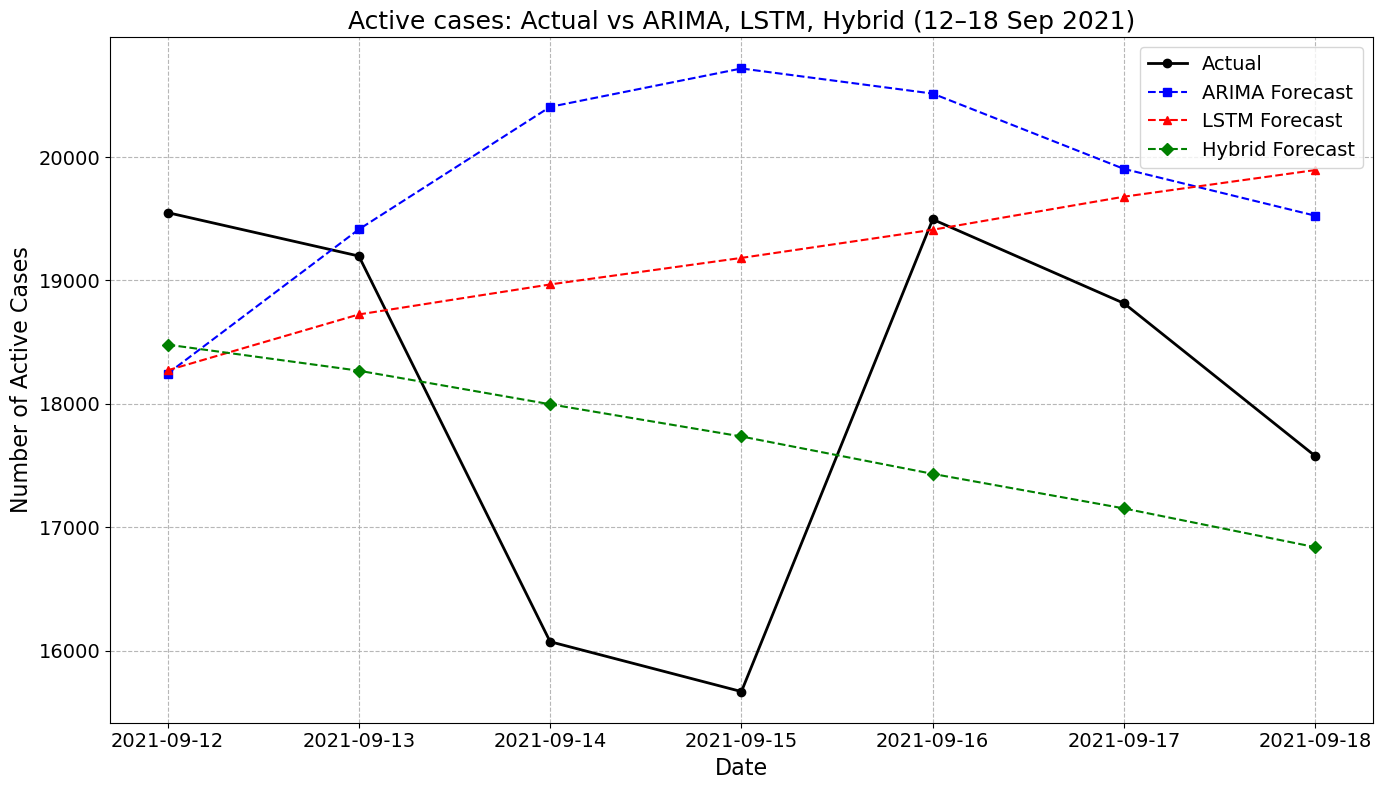

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

# Dates
dates = pd.date_range(start='2021-09-12', end='2021-09-18')

# Actual values
actual = [19550, 19198, 16073, 15669, 19495, 18815, 17577]

# Forecast values
hybrid = [18480, 18269, 17997, 17736, 17433, 17153, 16839]
lstm = [18271.99, 18724.78, 18967.94, 19182.98, 19411.13, 19678.95, 19894.71]
arima = [18244.78, 19414.10, 20406.76, 20717.74, 20514.25, 19903.91, 19524.77]

# Create DataFrame
df = pd.DataFrame({
    'Actual': actual,
    'ARIMA': arima,
    'LSTM': lstm,
    'Hybrid': hybrid
}, index=dates)

 #Plotting
plt.figure(figsize=(14, 8))  # Bigger figure size

plt.plot(dates, actual, marker='o', label='Actual', color='black', linewidth=2)
plt.plot(dates, arima, marker='s', label='ARIMA Forecast', color='blue', linestyle='--')
plt.plot(dates, lstm, marker='^', label='LSTM Forecast', color='red', linestyle='--')
plt.plot(dates, hybrid, marker='D', label='Hybrid Forecast', color='green', linestyle='--')

# Labels and title with larger fonts
plt.xlabel('Date', fontsize=16)
plt.ylabel('Number of Active Cases', fontsize=16)
plt.title('Active cases: Actual vs ARIMA, LSTM, Hybrid (12–18 Sep 2021)', fontsize=18)

# Ticks font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Legend with larger font
plt.legend(fontsize=14)

# Grid and layout
plt.grid(True, linestyle='--', alpha=0.9)
plt.tight_layout()

# Show the plot
plt.show()

In [36]:
pip install dm-test

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement dm-test (from versions: none)
ERROR: No matching distribution found for dm-test


In [38]:
import numpy as np
from scipy import stats

# Step 1: Actual and forecast values
actual = np.array([592, 292, 413, 463, 422, 346, 388])
arima = np.array([214.86, 217.82, 220.88, 224.04, 227.30, 230.65, 234.11])
lstm = np.array([675.27, 622.35, 533.94, 499.13, 658.87, 756.98, 876.39])
hybrid = np.array([367, 372, 378, 385, 391, 397, 404])

# Step 2: Calculate forecast errors
e_arima = actual - arima
e_lstm = actual - lstm
e_hybrid = actual - hybrid

# Step 3: Compute loss differentials (using squared error loss)
d_arima_lstm = (e_arima**2) - (e_lstm**2)
d_arima_hybrid = (e_arima**2) - (e_hybrid**2)

# Step 4: DM test statistic function
def dm_test(d, h=1):
    d_bar = np.mean(d)
    d_var = np.var(d, ddof=1)
    dm_stat = d_bar / np.sqrt((d_var / len(d)))
    p_value = 2 * (1 - stats.t.cdf(np.abs(dm_stat), df=len(d) - 1))
    return dm_stat, p_value

# Step 5: Run DM test between models
dm_stat_1, p_val_1 = dm_test(d_arima_lstm)
dm_stat_2, p_val_2 = dm_test(d_arima_hybrid)

# Step 6: Print results
print("DM Test: ARIMA vs. LSTM")
print(f"DM Statistic = {dm_stat_1:.4f}, p-value = {p_val_1:.4f}\n")

print("DM Test: ARIMA vs. Hybrid")
print(f"DM Statistic = {dm_stat_2:.4f}, p-value = {p_val_2:.4f}")


DM Test: ARIMA vs. LSTM
DM Statistic = -0.8501, p-value = 0.4279

DM Test: ARIMA vs. Hybrid
DM Statistic = 3.1088, p-value = 0.0209
